In [2]:
library(ggplot2)
set.seed(361)

# Q1

In [36]:
n <- 10^5
f <- function(x){
  (2/sqrt(2*pi)) * exp(-(x^2/2))
}

We cannot integrate normal distribution with $\mu = 0,\;\sigma$ thus we cannot apply inverse transformation method. 

Reasoning:

$$
\begin{split}
Inverse\;Transform\;Method\Rightarrow F(x)=u\sim Uniform(0,\;1)\\
\Rightarrow F^{-1}(u)=x\sim f(x)
\end{split}
$$

Inorder to achieve this notation we need the cdf of x. If the cdf cannot be derived then inverse transform method would not work. 

We do not have the cdf and cannot get it thus this method cannot be used to create the sample. 

## Part B

In [37]:
g <- function(x){
  sqrt(2*exp(1) / pi) * exp(-x)
}

We need to find the M value as in the $\frac{f(x)}{M.g(x)}$ and we find it via getting the derivative by hand and equiating it to 0 to get the max value. 

$$
\begin{split}
f(x)&=\frac{2}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}\\
g(x)&=\sqrt{\frac{2e}{\pi}}e^{-x}\\
\frac{f(x)}{g(x)}&=\frac{\frac{2}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}}{\sqrt{\frac{2e}{\pi}}e^{-x}}=\frac{\sqrt{\frac{4}{2\pi}}}{\sqrt{\frac{2e}{\pi}}}e^{x-\frac{x^2}{2}}=\sqrt{\frac{1}{e}}e^{\frac{2x-x^2}{2}}=e^{\frac{2x-x^2-1}{2}}\\
\end{split}
$$

Take logarithm to make derivation easier.

$$
\begin{split}
ln(\frac{f(x)}{g(x)})&=-\frac{x^2-2x+1}{2}\\
Derivative&\Rightarrow 1-x=0\\
&\Rightarrow x=1
\end{split}
$$

Thus our $M=f(1)/g(1)$

In [38]:
M <- f(1)/g(1)

Now we can create the function

In [39]:
q1 <- function(n,f,g,M){
    sample <- c()
    for(i in 1:n){
      repeat{
        y <- rexp(1)
        u <- runif(1)
        if(u <= f(y)/(M*g(y))) break # if accepted, break.
      } 
      sample[i] <- y # assign the accepted.
    }
    return(sample)
}

In [40]:
sample <- q1(n,f,g,M)

Lets see if plots match

In [ ]:
a <- rnorm(1000000)
a <- a[a>=0]
hist(sample, freq = 0)
lines(a, f(a))

The plots are the same, meaning we have achieved a legitimate normal sample with accept&reject method.

# Q2

This is a typical transformation question. So what we need to do is to create a sample from $Cauchy(\mu=5,\sigma=3)$ by using the $Normal,\;InverseGamma$ functions. We know that the relationship is;

$$
\begin{split}
X&\sim N(0,\;1)\\
Y&\sim InvGamma(1/2,\;\sigma^2/2)\\
\Rightarrow Z&=\mu+X\sqrt{Z} \sim Cauchy(\mu, \sigma)
\end{split}
$$

Lets apply this transformation

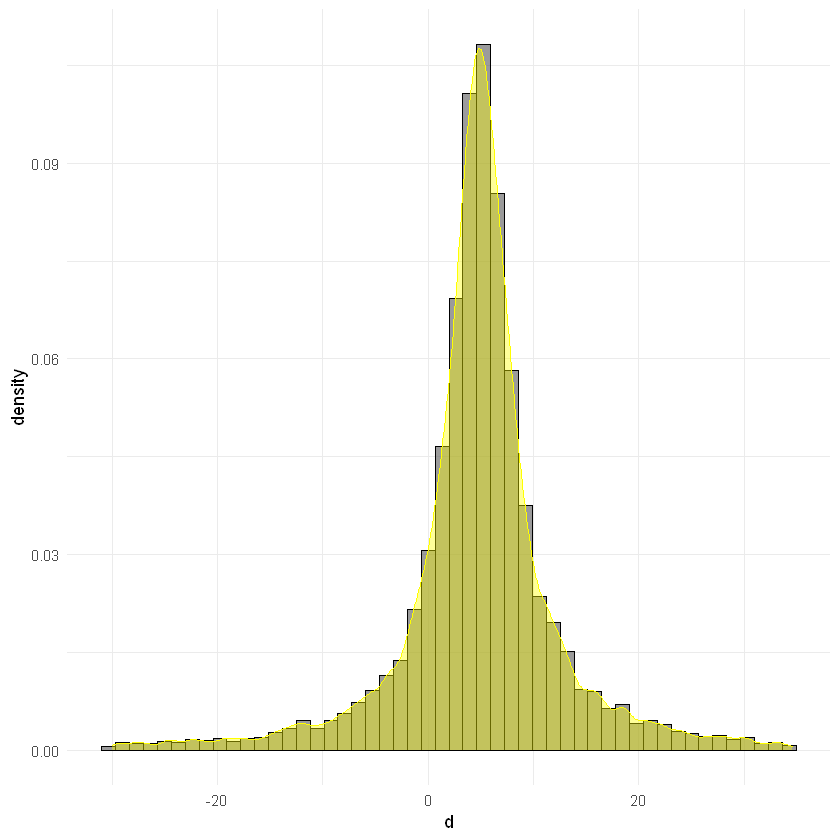

In [35]:
library(invgamma)
n <- 10^4
norm_n <- rnorm(n)
invgam_n <- rinvgamma(n, 1/2, 9/2)
cauchy <- 5 + norm_n * sqrt(invgam_n)
cauchy <- cauchy[cauchy < 35 & cauchy > -30]
q2.df = data.frame(d=cauchy)
ggplot(data=q2.df,aes(x=d)) + geom_histogram(aes(y=..density..),bins = 50, color='Black', fill='', alpha=.6, position="identity") +
    geom_density(data = q2.df, position = "stack", color='Yellow', fill='Yellow', alpha=.4) + theme_minimal()

In [ ]:
ggplot(df, aes(x = x)) + 
  geom_histogram(aes(y = ..density..),
                 colour = 1, fill = "white") +
  geom_density()

# Q3

In order to do this question we need to find the inverse of cdf of our pdf.

$$
f(x)=\left\{
\begin{array}{ll}
    \frac{1}{2}e^{2-x},\;x\leq2\\
    \frac{1}{2}e^{x-2},\;x>2\\
\end{array}\right.
\Rightarrow
F(x)=\left\{
\begin{array}{ll}
\frac{2-e^{2-x}}{2},\;x\leq2\\
\frac{1}{2}e^{x-2},\;x>2\\
\end{array}\\\\
\right.
$$

After finding the cdf we can calculate the inverse by hand



$$
\\
Inverse\Rightarrow F^{-1}(u)=\left\{
\begin{array}{ll}
2-ln(2u),\;\frac{1}{2}\leq u\leq2\\
2+ln(2u),\;0\leq u<\frac{1}{2}\\
\end{array}
\right.\\\\
$$

Now that we have the inverse of the given function we can write the code.

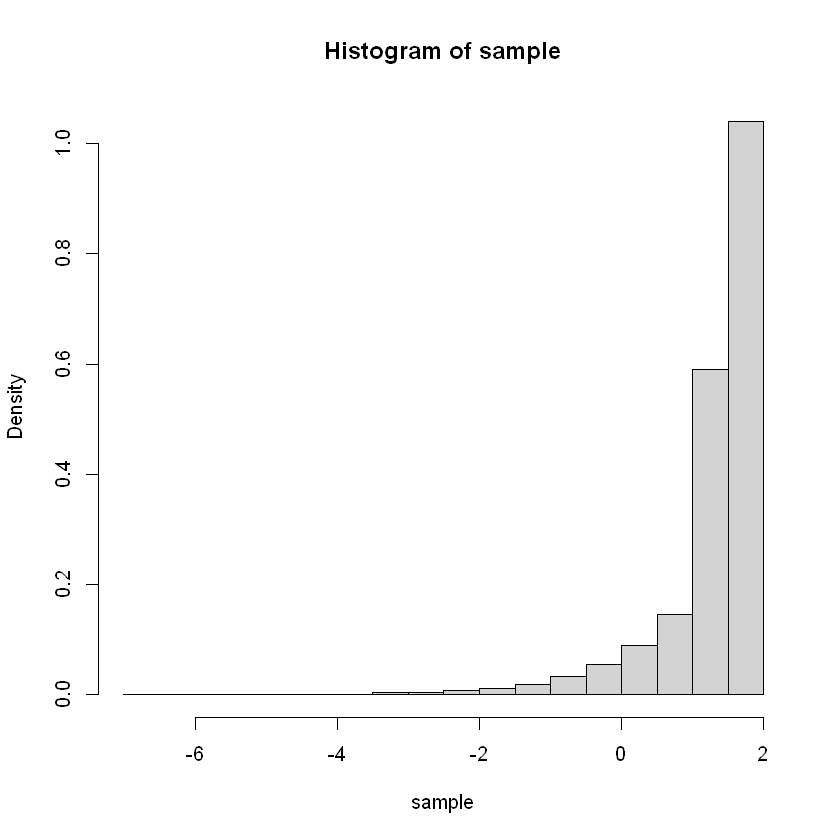

In [9]:
n <- 10^4
sample <- runif(n) #u values
sample <- ifelse(sample >= 1/2, 2-log(2*sample), log(2*sample)+2) #the formulas
hist(sample, freq=0)

## The statistics:

In [10]:
min(sample)
mean(sample)
median(sample)
max(sample)

[1] -6.962404

[1] 1.307144

[1] 1.517837

[1] 1.99994

# Q4

For this question we first need to find the $M$ constant as in $\frac{f(x)}{M.g(x)}$ and that can be achieved by equalizing the derivative of $\frac{f(x)}{g(x)}$ to 0.

$$
\begin{split}
\frac{f(x)}{g(x)}&=\frac{2c}{\pi}(1-x^2)^{1/2}\\
derivative&\Rightarrow\frac{2c}{\pi}.\frac{1}{2}(1-x^2)^{1/2}.-2x=0\\\\
&\Rightarrow\frac{-2cx}{\pi}.\frac{1}{(1-x)(1+x)}=0\\
x&=0
\end{split}
$$

The maximum point is at $x = 0$, so our M becomes $M=\frac{f(0)}{g(0)}=\frac{2c}{\pi}$ 
It seems that our $M$ contains the $c$ parameter from Uniform function. But we know for a fact that our f(x) is of elliptical shape thus it ends at a x value which is $x=1$. This means that we can take c as 1. In the end our $M.g(x)=2/\pi$

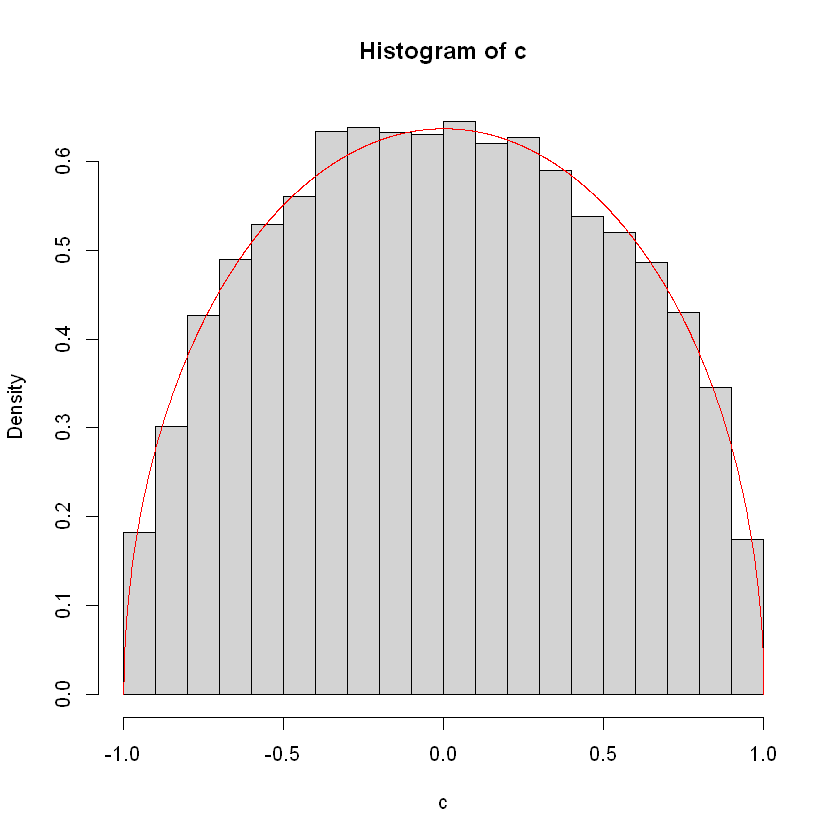

In [23]:
n <- 10^4

f <- function(x){
    2/pi * sqrt(1-x^2)
}

c <- c()
for(i in 1:n){
    repeat{
        u <- runif(1)
        y <- runif(1, -1, 1)
        if(u <= (f(y)*pi)/2) break
    }
    
    c[i] <- y
}

a <- seq(-1,1,0.001)
hist(c, freq=0)
lines(a, f(a), col='Red')

As it can be seen, the density line of the pdf is a perfect match to our sample. Our job has been done.

# Q5

## Part A

For this question we will need the cdf of $Geometric$ distribution and that can be derived or found in the internet to be $F(x;p)=1-(1-p)^{x+1}=1-q^{x+1}$.
The inverse can be found by following steps;

$$
\begin{split}
F(x)&=1-q^{x+1}\\
\Rightarrow q^{x+1}&=1-F(x)\\
\Rightarrow(x+1)ln(q)&=ln(1-F(x))\\
\Rightarrow x&=\frac{ln(1-F(x))}{ln(q)}-1
\end{split}
$$

And by the property $F(x)\sim U(0,1)$

$$
x=\frac{ln(F(x))}{ln(q)}-1
$$

But because that the fraction will yield continuous results, we need to add the ceiling function so that the results will always be discrete and bigger than 0 when we extract 1. But doing ceiling(a) - 1 and just saying floor(a) is the same thus we will use that.

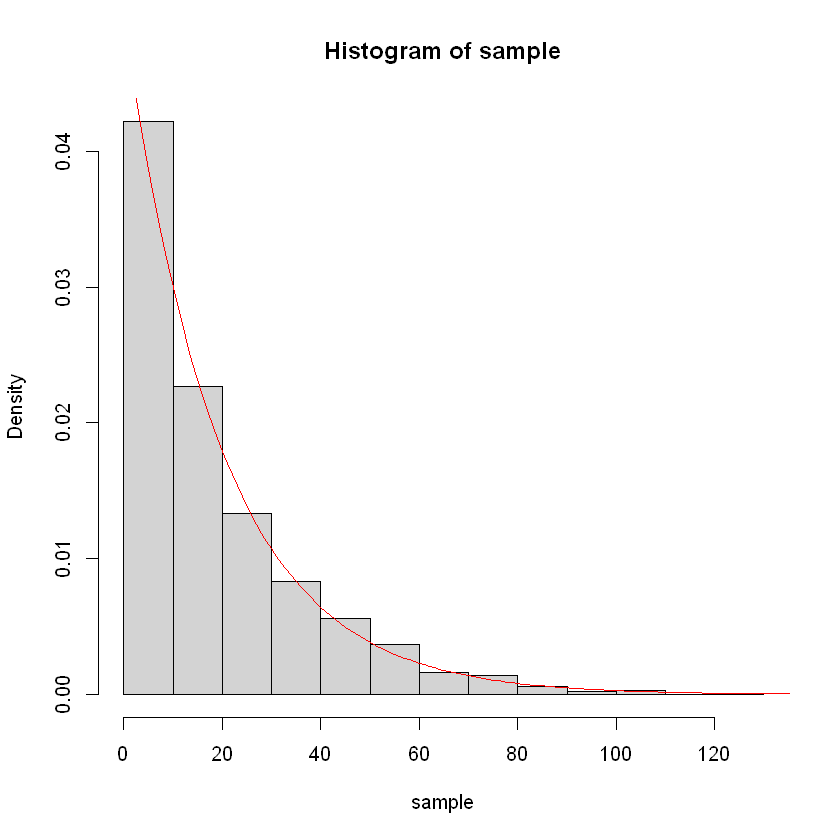

In [12]:
n <- 1000
q <- 1-4/80
u <- runif(1000)
sample <- floor(log(u)/log(q))
a <- seq(0,150,1)
hist(sample, freq=0, breaks=14)
lines(a, dgeom(a, 4/80), col='Red')

In [13]:
mean(sample)
var(sample)

[1] 19.501

[1] 367.2432

In [14]:
mean(rgeom(1000, 4/80))
var(rgeom(1000, 4/80))

[1] 19.357

[1] 356.3197

## Part B

In [15]:
# Generated by hand
length(sample[sample>=6])/length(sample) #prob of being bigger/equal to 6

[1] 0.743

In [16]:
# Generated by computer
a <- rgeom(5000, 4/80)
length(a[a>=6])/length(a) #prob of being bigger/equal to 6

[1] 0.7322

These results are very similar. 

# Q6

## Part A

In [17]:
n <- 10^5
a <- 5
b <- 11
sample <- matrix(data=NA, nrow=n, ncol=a+b-1)
for(i in 1:n){
    for(k in 1:(a+b-1)){
        sample[i,k] <- runif(1)
    }
}

In [18]:
k <- t(apply(sample, 1, sort))[,5] #sort all rows, take the fifth order aka column.

## Part B

In [19]:
mean(k)
var(k)

[1] 0.312329

[1] 0.01258703

In [20]:
a/(a+b)
(a*b/((a+b)^2*a+b+1))

[1] 0.3125

[1] 0.04256966

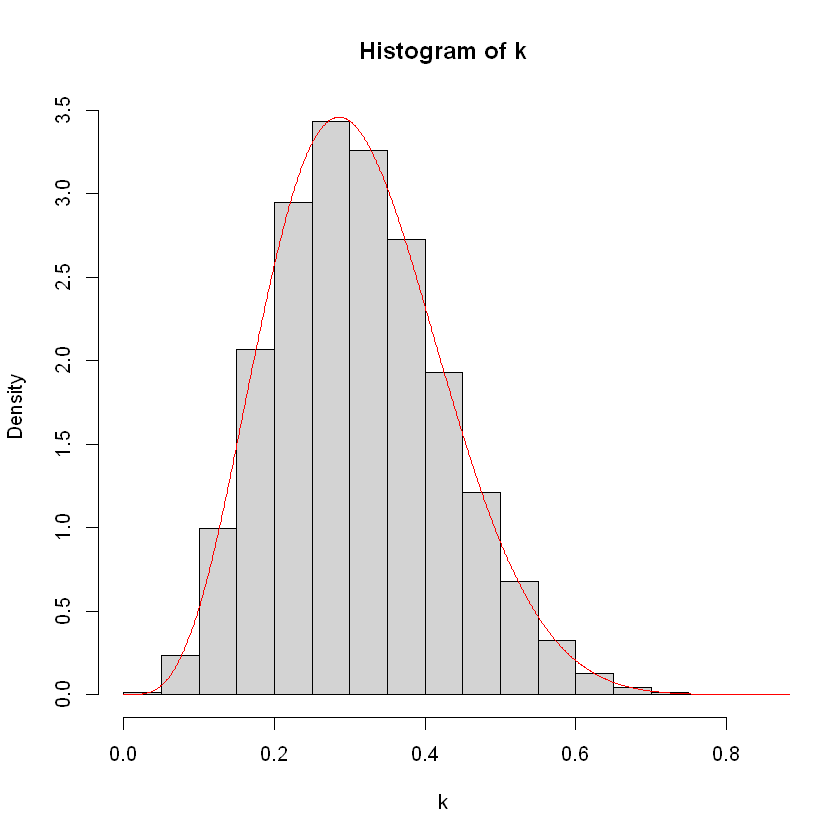

In [21]:
a <- seq(0,1,0.001)
hist(k, breaks=12, freq=0)
lines(a, dbeta(a, 5, 11), col='Red')

It seems that we have achieved the desired result.